# Sahil Sheikh
## CWID: A20518693
## Subject:CS 577
## Semester: FALL 22
## ASSIGNMENT 5
Q2 Part1

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,Embedding
from keras.utils.data_utils import pad_sequences
import os
from sklearn.model_selection import train_test_split
from keras.datasets import reuters

In [11]:
def plot(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model Loss')
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    plt.show()
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'])
    plt.show()
    return 0

In [42]:
def plot_2(history):
    acc = history.history['acc']
    loss = history.history['loss']
    val_acc =history.history['val_acc']
    val_loss =history.history['val_loss']
    epochs=range(1,len(acc)+1)
    plt.plot(epochs,acc,'bo',label='training acc')
    plt.plot(epochs,acc,'g',label='training acc')
    plt.plot(epochs,val_acc,'b',label='validation acc')
    plt.title('Training and validation acc')
    plt.legend()
    plt.show()
    plt.plot(epochs,loss,'bo',label='training loss')
    plt.plot(epochs,loss,'g',label='training loss')
    plt.plot(epochs,val_loss,'b',label='validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
    return 0


In [3]:
def load_data():
    maxlen = 300
    (train_x, train_y),(test_x, test_y) = reuters.load_data(num_words=10000,skip_top=0)
    train_x = pad_sequences(train_x, maxlen=maxlen)
    test_x = pad_sequences(test_x, maxlen=maxlen)
    train_x,vali_x,train_y,vali_y = train_test_split(train_x,train_y, test_size=0.2)
    from tensorflow.keras.utils import to_categorical
    test_y = to_categorical(test_y)
    train_y = to_categorical(train_y)
    vali_y = to_categorical(vali_y)
    
    return train_x,train_y,vali_x,vali_y,test_x,test_y

In [16]:
def model_embed_layer():
    model = tf.keras.Sequential([
        keras.layers.Embedding(10000,64,input_length=300),
        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(46,activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics = ['acc'])
    return model

In [18]:
def model_embed_layer2():
    model = tf.keras.Sequential([
        keras.layers.Embedding(10000,64,input_length=300),
        keras.layers.Flatten(),
        keras.layers.Dense(64,activation='relu'),
        keras.layers.Dense(46,activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['acc'])
    return model

In [30]:
train_x, train_y, vali_x, vali_y, test_x, test_y = load_data()

In [5]:
print('Training data shape:',train_x.shape)
print('Training label shape:',train_y.shape)
print('Testing data shape:',test_x.shape)
print('Testing label shape:',test_y.shape)
print('Vali data shape:',vali_x.shape)
print('Vali label shape:',vali_y.shape)

Training data shape: (7185, 300)
Training label shape: (7185, 46)
Testing data shape: (2246, 300)
Testing label shape: (2246, 46)
Vali data shape: (1797, 300)
Vali label shape: (1797, 46)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 64)           640000    
                                                                 
 flatten_2 (Flatten)         (None, 19200)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1228864   
                                                                 
 dense_5 (Dense)             (None, 46)                2990      
                                                                 
Total params: 1,871,854
Trainable params: 1,871,854
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
57/57 [==============================] - 1s 11ms/step - loss: 2.1780 - acc: 0.4419 - val_loss: 1.8017 - val_acc: 0.5192
Epoch 2/5
57/57 [=============================

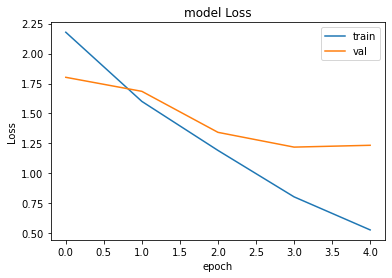

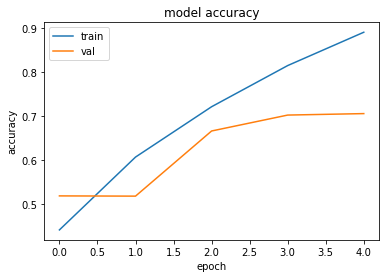

0

In [15]:
epoch = 5
b_size = 128
model1 = model_embed_layer()
model1.summary()
results1 = model1.fit(train_x,train_y,epochs=epoch, validation_data=(vali_x,vali_y),batch_size=b_size)
plot(results1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 64)           640000    
                                                                 
 flatten_3 (Flatten)         (None, 19200)             0         
                                                                 
 dense_6 (Dense)             (None, 64)                1228864   
                                                                 
 dense_7 (Dense)             (None, 46)                2990      
                                                                 
Total params: 1,871,854
Trainable params: 1,871,854
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
225/225 [==============================] - 2s 6ms/step - loss: 1.8925 - acc: 0.5204 - val_loss: 1.4995 - val_acc: 0.6305
Epoch 2/10
225/225 [========================

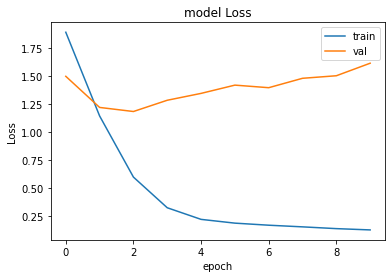

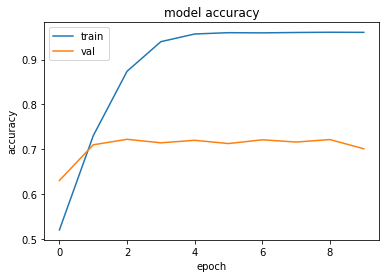

0

In [17]:
epoch = 10
b_size = 32
model2 = model_embed_layer()
model2.summary()
results2 = model2.fit(train_x,train_y,epochs=epoch, validation_data=(vali_x,vali_y),batch_size=b_size)
plot(results2)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 300, 64)           640000    
                                                                 
 flatten_4 (Flatten)         (None, 19200)             0         
                                                                 
 dense_8 (Dense)             (None, 64)                1228864   
                                                                 
 dense_9 (Dense)             (None, 46)                2990      
                                                                 
Total params: 1,871,854
Trainable params: 1,871,854
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
57/57 [==============================] - 1s 8ms/step - loss: 2.3420 - acc: 0.4212 - val_loss: 1.9011 - val_acc: 0.4997
Epoch 2/5
57/57 [==============================

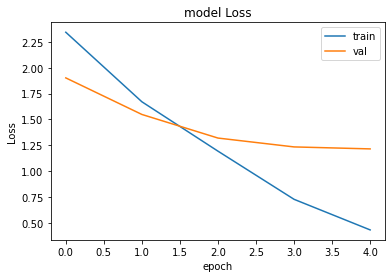

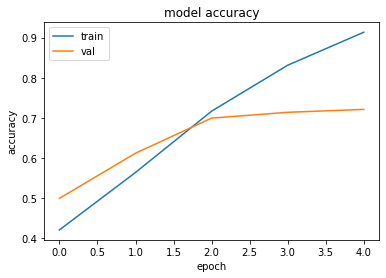

0

In [19]:
epoch = 5
b_size = 128
model3 = model_embed_layer2()
model3.summary()
results3 = model3.fit(train_x,train_y,epochs=epoch, validation_data=(vali_x,vali_y),batch_size=b_size)
plot(results3)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 300, 64)           640000    
                                                                 
 flatten_5 (Flatten)         (None, 19200)             0         
                                                                 
 dense_10 (Dense)            (None, 64)                1228864   
                                                                 
 dense_11 (Dense)            (None, 46)                2990      
                                                                 
Total params: 1,871,854
Trainable params: 1,871,854
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
225/225 [==============================] - 1s 5ms/step - loss: 1.9862 - acc: 0.4882 - val_loss: 1.5246 - val_acc: 0.6411
Epoch 2/10
225/225 [========================

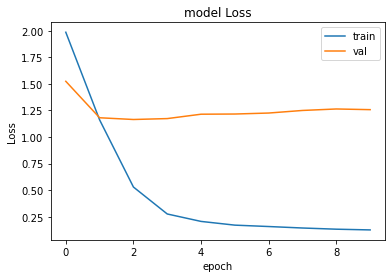

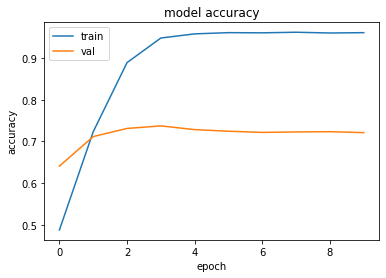

0

In [20]:
epoch = 10
b_size = 32
model4 = model_embed_layer2()
model4.summary()
results4 = model4.fit(train_x,train_y,epochs=epoch, validation_data=(vali_x,vali_y),batch_size=b_size)
plot(results4)

In [31]:
loss,acc = model4.evaluate(test_x,test_y, verbose=1)
print('Test accuracy of model is ', (acc)*100,'%')

71/71 [==============================] - 0s 2ms/step - loss: 1.3946 - acc: 0.6968
Test accuracy of model is  69.67942714691162 %


the remaing  code was done in different program. Please look at it